<a href="https://colab.research.google.com/github/Chauhan-Purushottam/IPP_Assignment/blob/master/Word2Vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Google Drive Setting


In [0]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}


In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive -o nonempty
!ls drive/"Deep_Learning"

' ACL_1.xls'   Assign1.ipynb   CNN


In [0]:
os.path.isfile("drive/Deep_Learning/ ACL_1.xls")


True

### Reading Data From Drive

In [0]:
import xlrd 
import re
  
loc = ("drive/Deep_Learning/ ACL_1.xls") 
  
wb = xlrd.open_workbook(loc) 
sheet = wb.sheet_by_index(0) 
  
# For row 1 and column 5 
sheet.cell_value(1, 5) 
doc = [] 
for j in range(5000):       #read only 5000 title due to memory issue
    doc.insert(j,re.sub(r'\d+','',sheet.cell_value(i+1, 5)))       #All numeric value truncated
print(doc[0])

What Some Semantic Theories Can't Do  (Th R Hofmann), NL in Information Science (Donald E Walker; Hans Karlgren; Martin Kay), CAL in Science Education, New Journal Annuals Of the History of Computing (Bernard A Caller), New England Research Application Center, Linguafranca Document Search (LLBA), Demonstration Interactive Search of LLBA, NFAIS/ UNESCO Indexing Education Kit, Synmposium Computer Assisted Learning (J J Mathews),  Linguistics Institute Conference And Symopsia, DATA Bases Usability and Responsiveness (Dr Allen Baiter), Conferences Internal Auditing  (D Eugene Shaeffer), Conferences Breifly Noted (K preston Jr), NSF Awards in Computer Science for , AJCL A Description, AJCL Page Format, AJCL Opaque Card format, AFIPS Washington Newsletter


### Term-Term matrix 

In [0]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(min_df=1)
X = vec.fit_transform(doc)
#print(vec.get_feature_names())
df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
print(df)

      aaas  abandoning  abbreviation  abbreviations  abduction  abductive  \
0        0           0             0              0          0          0   
1        0           0             0              0          0          0   
2        0           0             0              0          0          0   
3        0           0             0              0          0          0   
4        0           0             0              0          0          0   
5        0           0             0              0          0          0   
6        0           0             0              0          0          0   
7        0           0             0              0          0          0   
8        0           0             0              0          0          0   
9        0           0             0              0          0          0   
10       0           0             0              0          0          0   
11       0           0             0              0          0          0   

###  tranforming  the above matrix using SVD

In [0]:
import numpy as np
from numpy import array
from scipy.linalg import svd
mat = np.asmatrix(df)
print(mat.shape)
U, s, VT = svd(mat)      # Decomposing the matrix into 3 matrix by using svd() method
print(U)
print("Dimention : ",U.shape)
print("*******************************************************************")

print(s)
print("Dimention : ",s.shape)
print("*******************************************************************")

print(VT)
print("Dimention : ",VT.shape)
print("*******************************************************************")



(5000, 5424)
[[-8.92328193e-02  1.73991894e-02 -3.19858495e-02 ...  5.38642882e-02
   5.70820658e-02  3.85876229e-02]
 [-8.13397819e-02  4.34739048e-02 -2.76980890e-02 ...  2.24292613e-02
   7.69561566e-03  2.36008862e-02]
 [-3.91502278e-02  3.10107179e-02 -1.51795056e-02 ... -3.16096249e-03
  -1.31434432e-02  8.17573264e-03]
 ...
 [-1.69461583e-02  6.56306472e-03 -1.17054442e-02 ... -6.04984812e-17
   4.30970364e-18 -9.10729825e-18]
 [-1.70351112e-04 -1.03261518e-04 -4.28939839e-04 ... -9.74697753e-17
   2.92734587e-17  2.01119503e-16]
 [-4.04984214e-03  8.49389315e-04 -1.48784178e-03 ... -2.71050543e-17
   4.80301562e-17 -1.56125113e-17]]
Dimention :  (5000, 5000)
*******************************************************************
[6.12496004e+01 3.70089259e+01 3.49271056e+01 ... 2.55042701e-15
 1.48241002e-15 7.97453678e-16]
Dimention :  (5000,)
*******************************************************************
[[-7.91143260e-03 -2.31993855e-04 -2.58126844e-04 ... -7.50020297e-04
 

# Transformed matrix after implementing SVD

In [0]:
from numpy import diag
from numpy import dot
from numpy import zeros
# created m x n Sigma matrix
Sigma = zeros((df.shape[0], df.shape[1]))
# populated Sigma with n x n diagonal matrix
Sigma[:df.shape[0], :df.shape[0]] = diag(s)
print(Sigma.shape)
# reconstruct matrix
B = U.dot(Sigma.dot(VT))
print(B)
print(B.shape)

(5000, 5424)
[[-1.79241838e-15  2.58081963e-15 -1.14695072e-15 ... -6.43923785e-18
   2.02385640e-16  1.12020262e-16]
 [-2.28069098e-14  1.29970017e-14 -3.57676603e-15 ... -1.45752563e-16
   1.35753240e-16  2.33632572e-16]
 [ 7.84009905e-15 -1.79651224e-14  1.03511472e-14 ...  2.44067762e-16
   8.28857707e-17 -5.32265908e-17]
 ...
 [-1.00195527e-16 -5.08874948e-16 -1.35796322e-17 ...  7.14109655e-18
   1.21866865e-18 -1.45853780e-18]
 [-3.70932668e-17  1.69216854e-16  1.22948526e-16 ...  1.89396567e-18
  -1.16687259e-17  2.54109884e-18]
 [-1.31462055e-16 -6.87476504e-16 -1.13631164e-16 ... -1.10813085e-17
  -3.73855197e-17 -4.21852319e-17]]
(5000, 5424)


In [0]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Construction of WordtoVec

In [0]:
from nltk.tokenize import  word_tokenize
from gensim.models import Word2Vec
token = []
# tokenizing the sentence of each title into individual word
for i in range(1000):
  token.insert(i,word_tokenize(doc[i]))
print(token)

[['What', 'Some', 'Semantic', 'Theories', 'Ca', "n't", 'Do', '(', 'Th', 'R', 'Hofmann', ')', ',', 'NL', 'in', 'Information', 'Science', '(', 'Donald', 'E', 'Walker', ';', 'Hans', 'Karlgren', ';', 'Martin', 'Kay', ')', ',', 'CAL', 'in', 'Science', 'Education', ',', 'New', 'Journal', 'Annuals', 'Of', 'the', 'History', 'of', 'Computing', '(', 'Bernard', 'A', 'Caller', ')', ',', 'New', 'England', 'Research', 'Application', 'Center', ',', 'Linguafranca', 'Document', 'Search', '(', 'LLBA', ')', ',', 'Demonstration', 'Interactive', 'Search', 'of', 'LLBA', ',', 'NFAIS/', 'UNESCO', 'Indexing', 'Education', 'Kit', ',', 'Synmposium', 'Computer', 'Assisted', 'Learning', '(', 'J', 'J', 'Mathews', ')', ',', 'Linguistics', 'Institute', 'Conference', 'And', 'Symopsia', ',', 'DATA', 'Bases', 'Usability', 'and', 'Responsiveness', '(', 'Dr', 'Allen', 'Baiter', ')', ',', 'Conferences', 'Internal', 'Auditing', '(', 'D', 'Eugene', 'Shaeffer', ')', ',', 'Conferences', 'Breifly', 'Noted', '(', 'K', 'preston',

In [0]:
# training model
model = Word2Vec(token, min_count=4 , workers=4)

In [0]:
print(model)

Word2Vec(vocab=484, size=100, alpha=0.025)


In [0]:
# summarize vocabulary
words = list(model.wv.vocab)
print(words)

['Some', 'Semantic', 'Theories', '(', 'R', ')', ',', 'in', 'Information', 'Science', 'Donald', 'E', 'Walker', ';', 'Hans', 'Karlgren', 'Martin', 'Kay', 'Education', 'New', 'Journal', 'Of', 'the', 'of', 'Computing', 'A', 'England', 'Research', 'Application', 'Center', 'Document', 'Search', 'LLBA', 'Interactive', 'UNESCO', 'Indexing', 'Computer', 'Learning', 'J', 'Linguistics', 'Institute', 'Conference', 'And', 'Bases', 'and', 'Dr', 'Allen', 'Conferences', 'D', 'Eugene', 'Noted', 'K', 'Jr', 'NSF', 'for', 'AJCL', 'Description', 'format', 'AFIPS', 'Washington', 'Newsletter', 'The', 'From', 'Logical', 'a', 'Question', 'Answering', 'System', 'Nicholas', 'V', 'Richard', 'Press', 'At', 'David', 'G', 'Hays', 'Reviews', 'to', 'Published', 'ASIS', 'Structures', 'Processing', 'Zampolli', 'Natural', 'Language', 'Report', 'TINLAP-', 'Program', 'Abstracts', 'Dictionary', 'Society', 'North', 'Special', 'Meeting', 'NCC', 'Personal', 'P', 'National', 'Smith', 'Short', 'Notice', 'Upcoming', 'Recognition'

In [0]:
# access vector for one word
print(model['Semantic'])
# save model
model.save('model.bin')

[ 0.02445551  0.10419288  0.04438261  0.07603215 -0.09592889 -0.13261697
 -0.09072711  0.08275786  0.02045883  0.03939606  0.1005244   0.2544244
  0.00699051 -0.21688586  0.02378214 -0.16451721  0.11099912  0.05006339
  0.17989303 -0.20649636  0.16250303 -0.02737178  0.11044914  0.01654064
  0.00679655 -0.11718962 -0.070949    0.04739593  0.10687758 -0.07569084
  0.23256029  0.09354986  0.11740999  0.17534256  0.0061785   0.10898016
  0.13607806 -0.0812493   0.06905483  0.12710837 -0.05500894  0.22922221
 -0.06905711 -0.1034105  -0.14764374  0.048525    0.005829    0.18845302
  0.0977087   0.05473429 -0.02648185 -0.15418015 -0.12011424 -0.0023638
  0.08430059 -0.13383085  0.05080546  0.12560408  0.03148508 -0.01900463
 -0.09679081 -0.07969267  0.03309391 -0.04869201 -0.10427506 -0.0703401
 -0.03731689 -0.07005917 -0.25852892  0.05061186 -0.1024801   0.2003067
 -0.08856755  0.09331077 -0.19271798 -0.08762246  0.03859223 -0.21502928
 -0.0116244  -0.01417432  0.08213393  0.0133147  -0.018

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [0]:
# load model
new_model = Word2Vec.load('model.bin')
print(new_model)

Word2Vec(vocab=484, size=100, alpha=0.025)


### Plotting of randomly chosen words

In [0]:
from sklearn.decomposition import PCA
from matplotlib import pyplot
import random
from matplotlib import pyplot as plt
def words_plot(model):
    X = model.wv.vocab
    list_word = []
    for keys, value in X.items():
        list_word.append(keys)
    
    
    print(list_word[:30])
    random.shuffle(list_word)

    word_vec_list =[]
    labels = []
    # choosed only 100 words from the model
    for i in range(100):
        word_vec_list.append(model[list_word[i]])
        labels.append(list_word[i])
        
        
        
    pca = PCA(n_components=2, random_state =0)
    result = pca.fit_transform(word_vec_list)
    
    
    X_ax=[]
    Y_ax=[]
    for value in result:
        X_ax.append(value[0])
        Y_ax.append(value[1])
    plt.figure(figsize= (16,16))
    for i in range(len(X_ax)):
        plt.scatter(X_ax[i],Y_ax[i])
        plt.annotate(labels[i],
                     xy=(X_ax[i], Y_ax[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()
    

['Some', 'Semantic', 'Theories', '(', 'R', ')', ',', 'in', 'Information', 'Science', 'Donald', 'E', 'Walker', ';', 'Hans', 'Karlgren', 'Martin', 'Kay', 'Education', 'New', 'Journal', 'Of', 'the', 'of', 'Computing', 'A', 'England', 'Research', 'Application', 'Center']


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


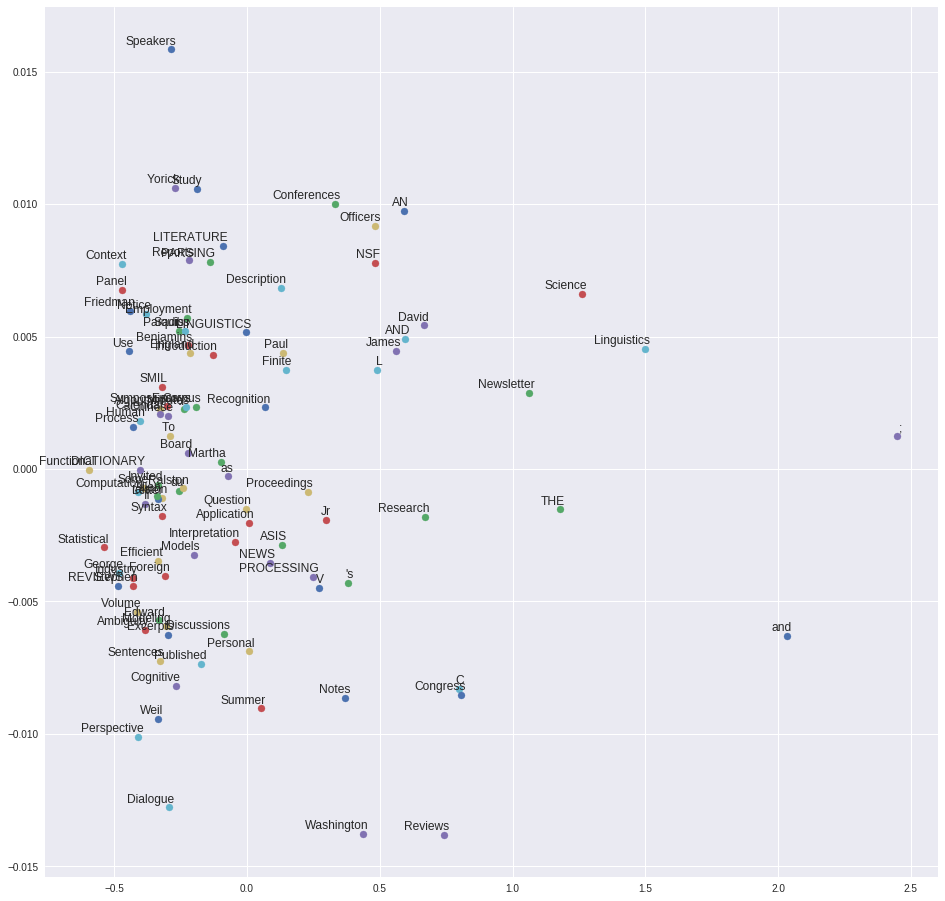

In [0]:
words_plot(model)